In [1]:
# first get the dataset x and y
# then train the model in that dataset
# then insert the model / fit the model/ train the model
# minimize the cost function or the error function
# use gradient descent


In [2]:
# need to know the architecture of the data
# linear or curve or planar

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
type(data)

sklearn.utils._bunch.Bunch

bunch object is a datatype that is define in the sklearn module
however it does work like a dictionary
with key value pairs

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.data.shape

(569, 30)

note that all the values for the data keys

are numpy arrays

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
#so 0 and 1 means malignant and benign respectively

In [13]:
data.target.shape

(569,)

In [14]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
# for each entry in data we have these 30 features that
# are responsible for determining the breast cancer

In [16]:
# there are 569 entries of these

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data.data, data.target, test_size = 0.33)

N means number of samples
D means the number of features

In [19]:
N,D = x_train.shape

In [20]:
print(N,D)

381 30


In [21]:
from sklearn.preprocessing import StandardScaler
# converts the data to standard normal data
# 0 mean and variance 1 is obtained

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Input(shape = (D,)) #models can take an arbitrary number of samples so we only need the feature count
            ,tf.keras.layers.Dense(1, activation = 'sigmoid')
        ]
        )

In [24]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [25]:
r = model.fit(x_train, y_train, validation_data = (x_test,y_test),epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 31ms/step - loss: 0.6882 - accuracy: 0.6693 - val_loss: 0.6598 - val_accuracy: 0.7128
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6376 - accuracy: 0.6982 - val_loss: 0.6130 - val_accuracy: 0.7287
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5941 - accuracy: 0.7402 - val_loss: 0.5719 - val_accuracy: 0.7660
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5562 - accuracy: 0.7612 - val_loss: 0.5359 - val_accuracy: 0.7766
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5223 - accuracy: 0.7822 - val_loss: 0.5048 - val_accuracy: 0.7979
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4935 - accuracy: 0.8031 - val_loss: 0.4772 - val_accuracy: 0.8191
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.4667 - accuracy: 0.8136 - val_loss: 0.4531 - val_accuracy: 0.8298
Epoch 8/100

In [26]:
print("Final Score:", model.evaluate(x_train, y_train))
print("Test Score:", model.evaluate(x_test, y_test))

12/12 [==============================] - 0s 8ms/step - loss: 0.0989 - accuracy: 0.9790
Final Score: [0.09890438616275787, 0.9790025949478149]
6/6 [==============================] - 0s 6ms/step - loss: 0.0956 - accuracy: 0.9681
Test Score: [0.09557735174894333, 0.9680851101875305]


In [27]:
#first entry is the loss
#second entry is the accuracy function

In [28]:
import matplotlib.pyplot as plt


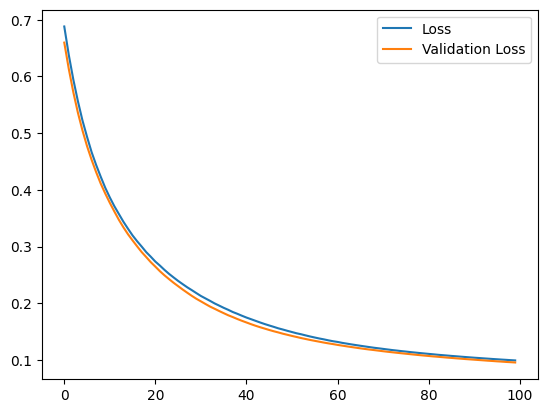

In [29]:
plt.plot(r.history['loss'],label = "Loss")
plt.plot(r.history['val_loss'],label = 'Validation Loss')
plt.legend()

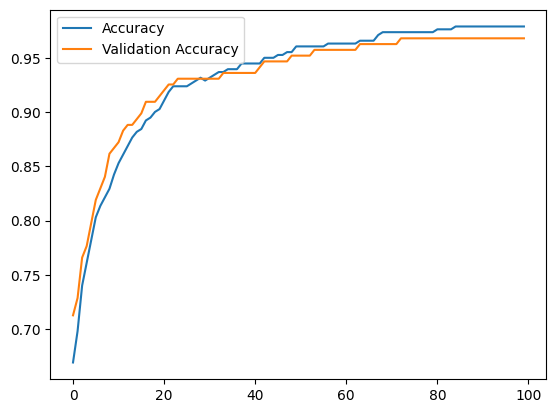

In [30]:
plt.plot(r.history['accuracy'],label = "Accuracy")
plt.plot(r.history['val_accuracy'], label = "Validation Accuracy")
plt.legend()

In [31]:
predictions = model.predict(x_test)

6/6 [==============================] - 0s 4ms/step


In [32]:
print(predictions)

[[8.66662920e-01]
 [2.89467145e-02]
 [9.86705363e-01]
 [9.84921932e-01]
 [3.89420131e-13]
 [1.87700571e-04]
 [9.89706814e-01]
 [9.70088959e-01]
 [9.96870756e-01]
 [8.22117329e-02]
 [8.53797607e-03]
 [1.44197804e-06]
 [8.36734533e-01]
 [9.77919579e-01]
 [9.80212450e-01]
 [8.57951701e-01]
 [9.32515800e-01]
 [8.67866387e-04]
 [9.49523151e-01]
 [9.96715844e-01]
 [7.89062083e-02]
 [9.09456372e-01]
 [2.21065129e-03]
 [9.96504426e-01]
 [9.93247628e-01]
 [8.14261966e-06]
 [9.59287226e-01]
 [4.08426598e-02]
 [9.97506857e-01]
 [9.88753796e-01]
 [9.97950315e-01]
 [9.54981055e-03]
 [7.99527109e-01]
 [9.93229508e-01]
 [8.71844649e-01]
 [9.81478095e-01]
 [5.40642068e-03]
 [4.21561152e-01]
 [3.73089679e-05]
 [1.53439529e-02]
 [1.91605419e-01]
 [6.54856026e-01]
 [1.37077030e-02]
 [6.73119328e-04]
 [9.82125044e-01]
 [4.27151647e-08]
 [1.00891266e-04]
 [5.53354563e-04]
 [9.94486809e-01]
 [2.04596552e-03]
 [7.12274574e-04]
 [7.56857455e-01]
 [9.67323065e-01]
 [7.54339397e-01]
 [9.60671425e-01]
 [8.949876

In [34]:
np.round(predictions).flatten()

array([1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1.], dtype=float32)

In [35]:
rounded_preds = np.round(predictions).flatten()

In [38]:
print("Manual accuracy: ", np.mean(rounded_preds == y_test))
print("Evaluated accuracy: ", model.evaluate(x_test, y_test))

Manual accuracy:  0.9680851063829787
6/6 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9681
Evaluated accuracy:  [0.09557735174894333, 0.9680851101875305]
